# Assignment: More Matplotlib

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. **Don't worry about how this code works.** In the end, it will give you some numpy arrays, which you will use in your plots. You are not allowed to use any packages other than numpy and matplotlib to complete your assignment.

### Problem 1: Line plots

In this problem, we will plot some daily weather data from a NOAA station in [Millbrook, NY](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1NYDT0008/detail). A full description of this dataset is available at: <https://www.ncdc.noaa.gov/data-access/land-based-station-data>

The cell below uses pandas to download the data and populate a bunch of numpy arrays (`t_daily_min`, `t_daily_max`, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_379/474508320.py:28: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


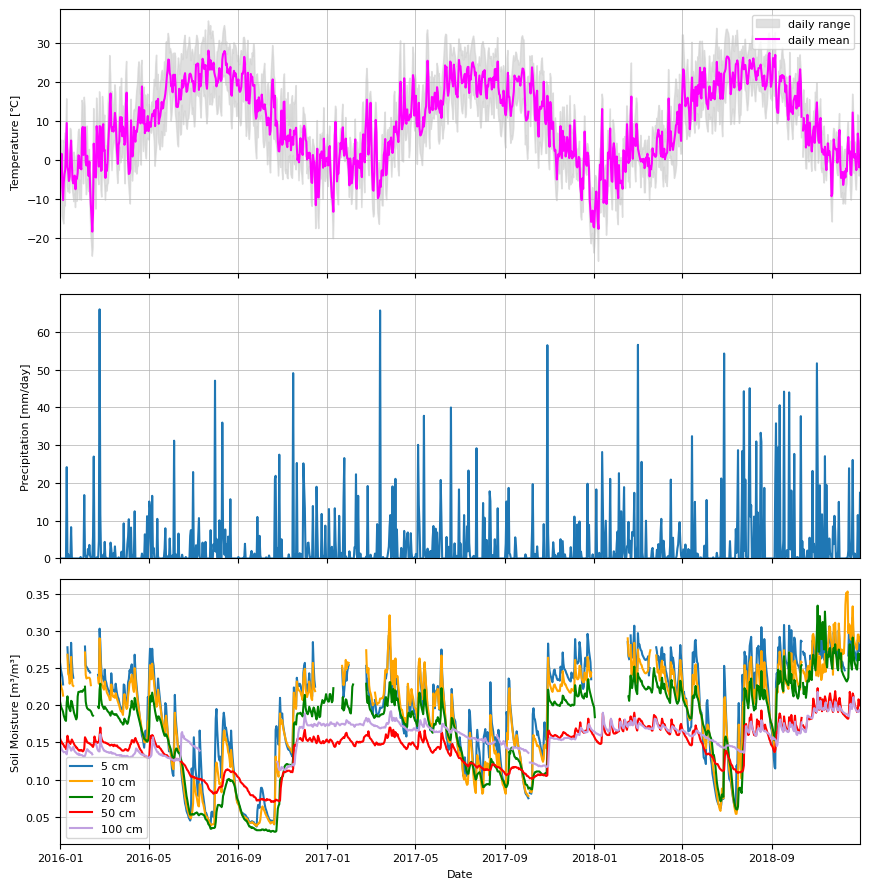

In [56]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from matplotlib import dates as da
import datetime 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8.8, 9))

ax3.xaxis.set_major_formatter (da.DateFormatter('%Y-%m'))
ax3.xaxis.set_major_locator (da.MonthLocator(interval = 4))
ax3.set_xlim (date[0], date[-1])
ax3.tick_params (axis = 'x', labelsize=8)

for ax in [ax1, ax2, ax3]:
    ax.tick_params (axis = 'y', labelsize=8)
    ax.grid (True, linewidth=0.5)

ax1.plot(date, t_daily_min, 'lightgray', alpha=0.1)
ax1.plot(date, t_daily_max, 'lightgray', alpha=0.1)
ax1.fill_between(date, t_daily_min, t_daily_max, color='lightgray', alpha=0.7, label='daily range')
ax1.plot(date, t_daily_mean, 'magenta', alpha=1, label='daily mean')
ax1.set_ylabel('Temperature [℃]', fontsize=8)
ax1.legend(loc='upper right', fontsize=8)

ax2.plot(date, p_daily_calc, label='Precipitation')
ax2.set_ylim (0, 70)
ax2.set_yticks (np.arange(0, 70, 10))
ax2.set_ylabel ('Precipitation [mm/day]', fontsize=8)

ax3.plot(date, soil_moisture_5, label = '5 cm')
ax3.plot(date, soil_moisture_10, 'orange', label = '10 cm')
ax3.plot(date, soil_moisture_20, 'g', label = '20 cm')
ax3.plot(date, soil_moisture_50, 'r', label = '50 cm')
ax3.plot(date, soil_moisture_100, '#C0A0E0', label='100 cm')
ax3.set_ylabel('Soil Moisture [m³/m³]', fontsize=8)
ax3.set_xlabel('Date', fontsize=8)
ax3.legend(loc='lower left', fontsize=8)

plt.tight_layout()
plt.show()

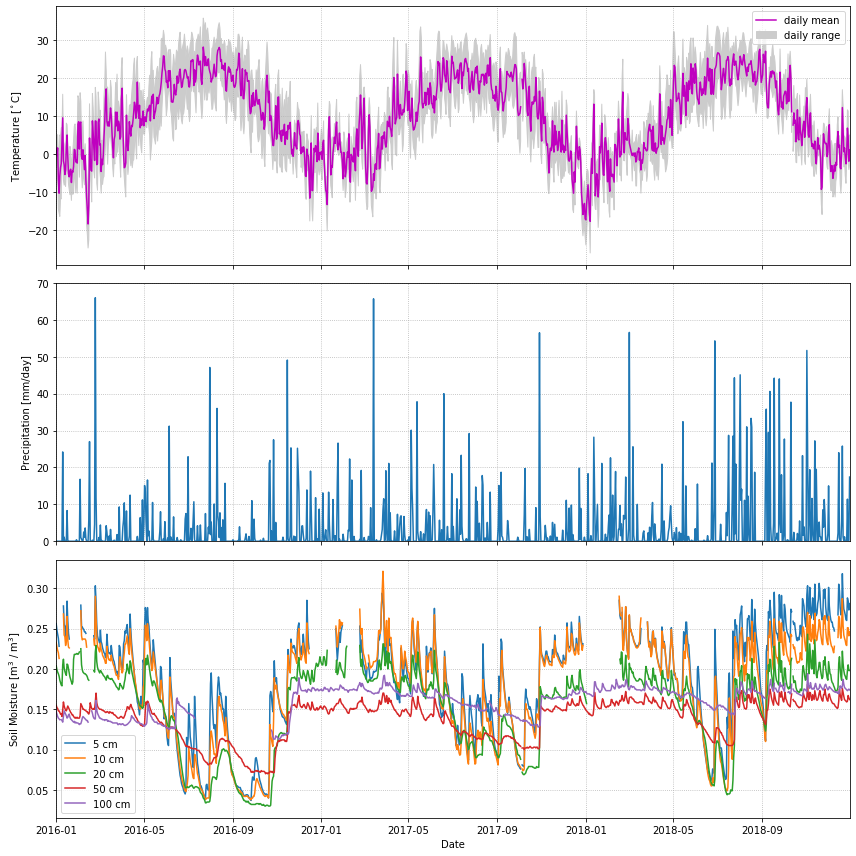

### Problem 2: Contour Plots

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [19]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

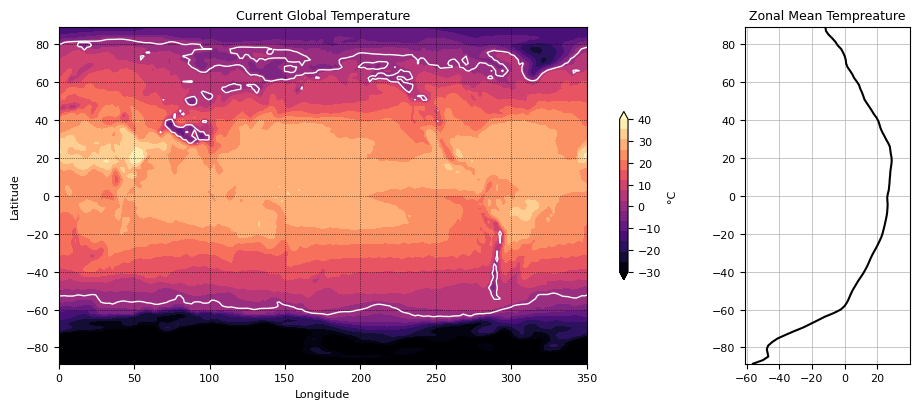

In [51]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9.3, 4.2), gridspec_kw={'width_ratios': [4, 1]}, sharey = True)

T_mean = np.mean(temp, axis = 1)
ax2.plot (T_mean, lat, 'k')
ax2.grid(True, linewidth=0.5)
ax2.set_title ('Zonal Mean Tempreature', fontsize = 9)
ax2.set_xlim([-61, 40])
ax1.set_ylabel ('Latitude', fontsize = 8)
ax2.tick_params(axis = 'x', labelsize=8)
ax2.set_xticks(np.arange(-60, 38, 20))
ax2.yaxis.set_tick_params(labelleft=True, labelsize=8)

contourf = ax1.contourf (lon, lat, temp, cmap='magma', levels=np.linspace(-30, 40, 16), extend = 'both')
cbar = fig.colorbar(contourf, ax=ax1, aspect=20, shrink=0.5) #aspect up thinner, down thikcer
cbar.set_ticks ([-30,-20,-10,0,10,20,30,40])
cbar.ax.tick_params (labelsize=8)
ax1.tick_params (axis = 'y', labelsize=8)
ax1.tick_params (axis = 'x', labelsize=8)
cbar.set_label ('°C', fontsize=8)
ax1.set_title ('Current Global Temperature', fontsize=9)
contour = ax1.contour(lon, lat, temp, levels = [0], colors = 'white', linewidths = 1, linestyles = 'solid')
ax1.set_xlabel ('Longitude', fontsize = 8)
ax1.set_ylabel ('Latitude', fontsize = 8)
ax1.set_xlim ([0, 350])
ax1.grid (True, linewidth=0.5, linestyle =':', color = 'k')


plt.tight_layout()
plt.show()

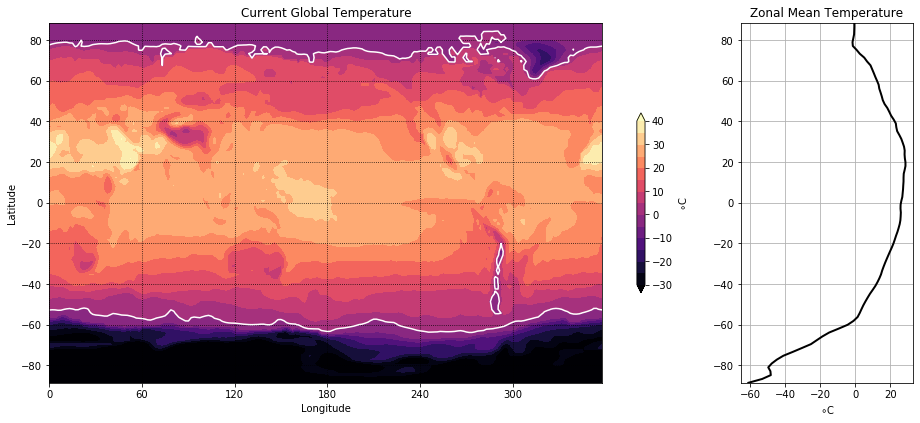

### Problem 3: Scatter plots
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude$^4$/100

In [6]:
import numpy as np

fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

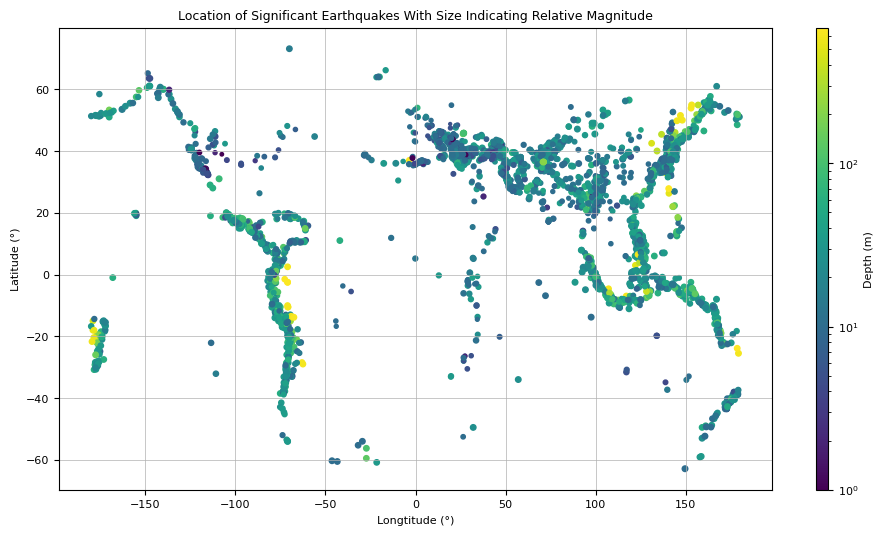

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize = (11.5,6))

splot = ax.scatter(longitude, latitude, c = depth, s =  magnitude*2, norm=LogNorm()) 
# s: marker size, c: marker colors

cbar = fig.colorbar(splot,aspect=40)
cbar.set_label('Depth [m]', fontsize=8)
cbar.ax.tick_params (labelsize=8)
ax.set_title('Location of Significant Earthquakes With Size Indicating Relative Magnitude', fontsize=9)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Latitude (°)', fontsize=8)
ax.set_xlabel('Longtitude (°)', fontsize=8)
ax.grid(which='major', linewidth=0.5)

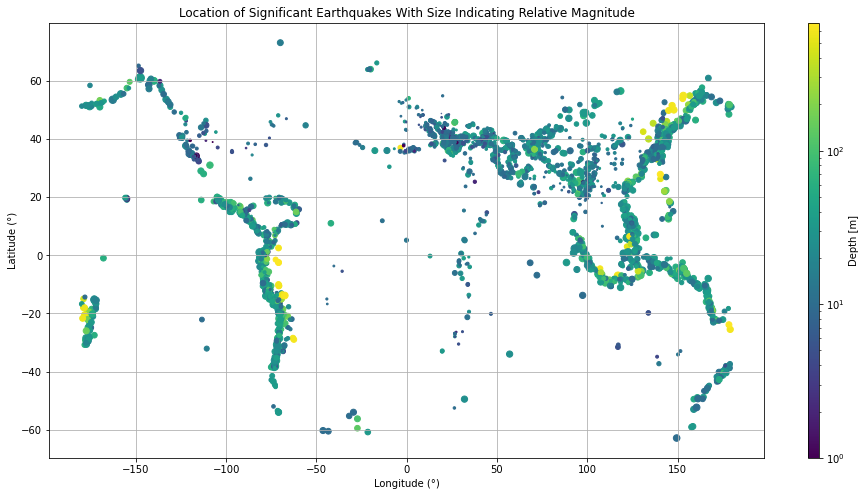